# Plotting and Visualization #
> * [code files](https://github.com/wesm/pydata-book)

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

## A Brief matplotlib API Primer

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

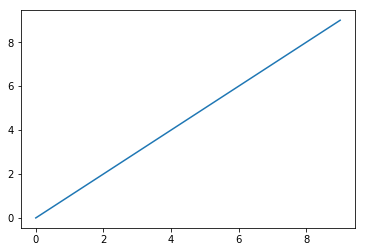

In [5]:
plt.plot(data)

### Figures and Subplots

* Plots in matplotlib reside in a Figure object.

* Below means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1).
* Then we are selecting number 2, and number 3 of the subplots respectively.

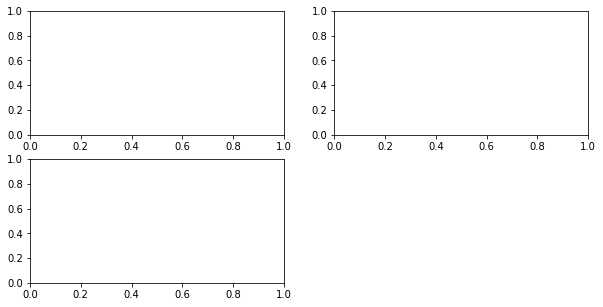

In [40]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

* When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation.
* The 'k--' is a style option instructing matplotlib to plot a black dashed line.

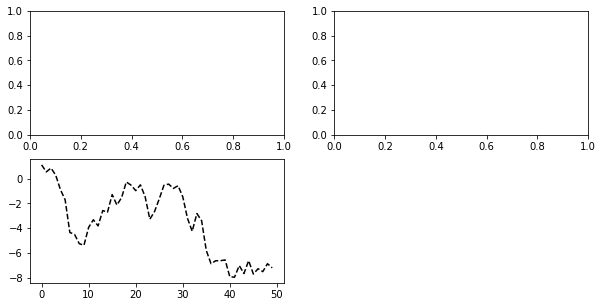

In [42]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

* The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one’s instance method.

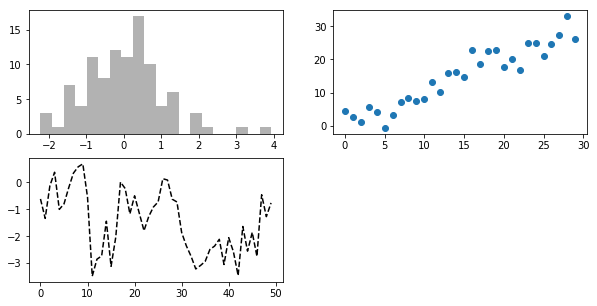

In [44]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [45]:
plt.close('all')

* Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A79AAF9B0>,
      dtype=object)

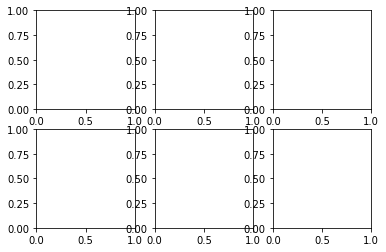

In [47]:
fig, axes = plt.subplots(2, 3)
axes

* pyplot.subplots options

Argument|	Description
---|---
nrows|	Number of rows of subplots
ncols|	Number of columns of subplots
sharex|	All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)
sharey|	All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)
subplot_kw|	Dict of keywords passed to add_subplot call used to create each subplot
**fig_kw|	Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))

#### Adjusting the spacing around subplots

* subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

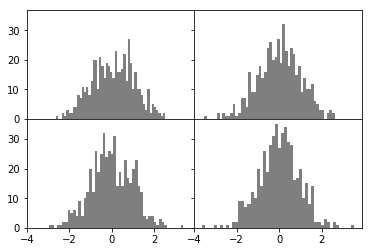

In [49]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

* to plot x versus y with green dashes
    * ax.plot(x, y, 'g--')
* or 
    * ax.plot(x, y, linestyle='--', color='g')

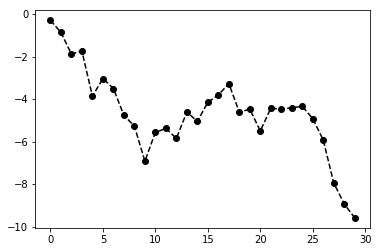

In [52]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

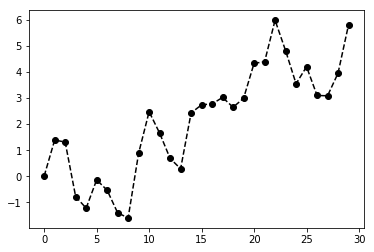

In [54]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [55]:
plt.close('all')

In [56]:
data = np.random.randn(30).cumsum()
data

array([-1.1037, -0.7128, -1.7687, -1.7635, -0.1083, -1.583 , -3.4796,
       -2.8112, -2.9763, -3.3909, -3.3713, -4.884 , -3.5347, -2.6654,
       -1.921 , -1.2086, -0.8806, -1.2647, -0.6083, -1.3082, -0.6782,
       -1.2871,  0.8635, -0.1549, -0.6243, -0.2516, -1.2987, -2.0767,
       -4.0824, -4.2278])

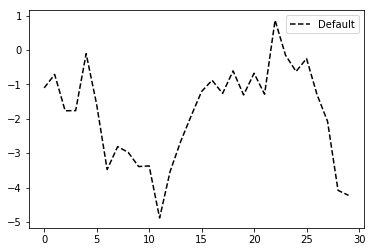

In [62]:
plt.plot(data, 'k--', label='Default')
plt.legend(loc='best')

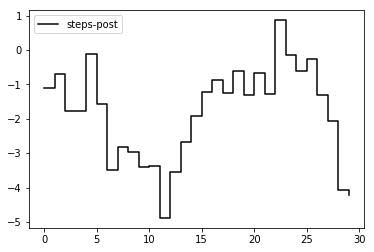

In [61]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

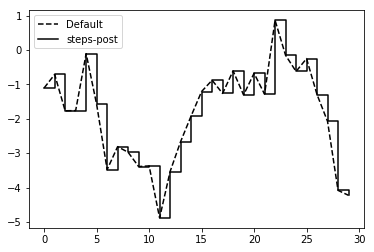

In [63]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

In [82]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
data = np.random.randn(1000).cumsum()
ax.plot(data)

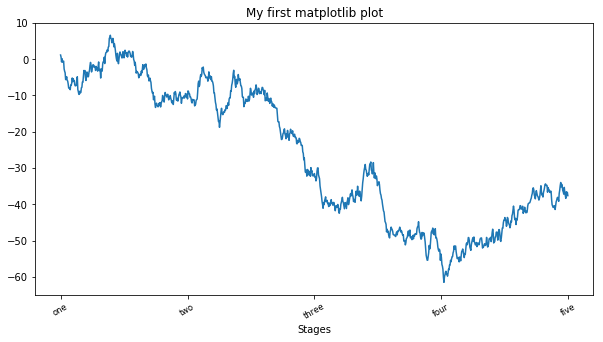

In [84]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(data)

In [75]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,3.2,'Stages'), Text(0.5,1,'My first matplotlib plot')]

#### Adding legends

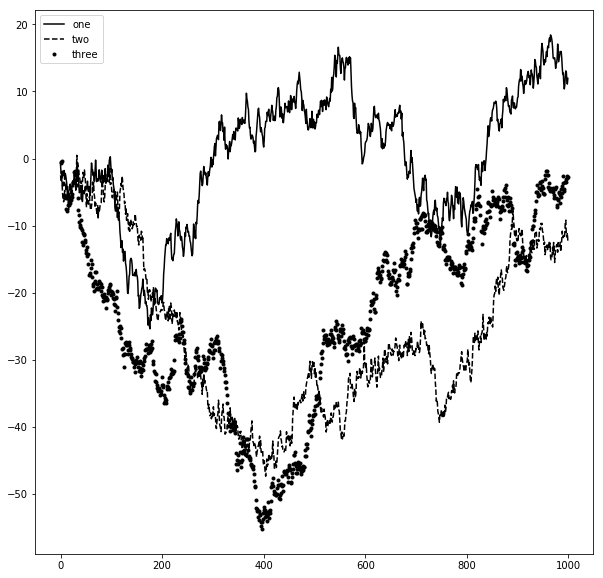

In [88]:
from numpy.random import randn
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

* text draws text at given coordinates (x, y) on the plot with optional custom styling
    * ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

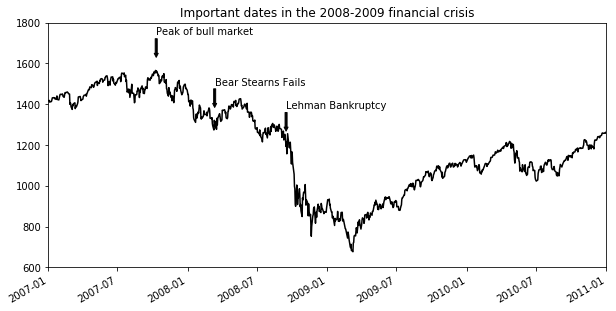

In [89]:
from datetime import datetime

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../../code/python-for-data-analysis/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

* matplotlib has objects that represent many common shapes, referred to as patches

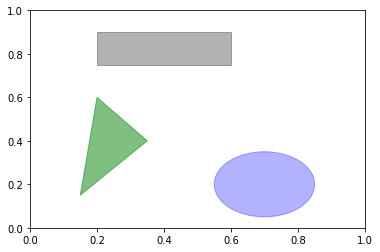

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

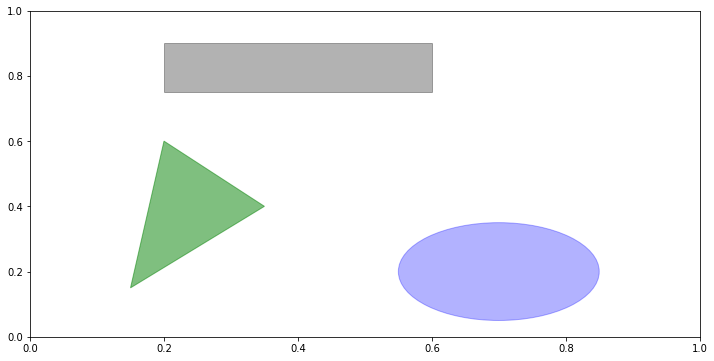

In [92]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

```python
plt.savefig('figpath.svg')
```

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

* savefig doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO

```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

* Figure.savefig options

Argument|	Description
---|---
fname|	String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG)
dpi|	The figure resolution in dots per inch; defaults to 100 out of the box but can be configured
facecolor, edgecolor|	The color of the figure background outside of the subplots; 'w' (white), by default
format|	The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)
bbox_inches|	The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure

### matplotlib Configuration

* to set the global default figure size to be 10 × 10

```python
plt.rc('figure', figsize=(10, 10))
```

```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

## Plotting with pandas and seaborn

### Line Plots

In [93]:
plt.close('all')

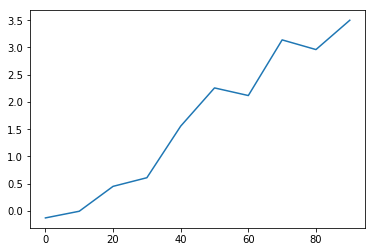

In [94]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [95]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

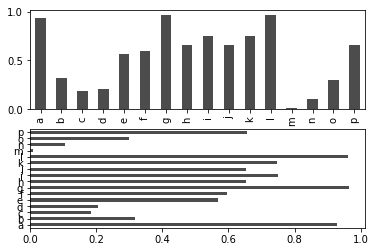

In [3]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [4]:
np.random.seed(12348)

In [5]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus         A         B         C         D
one    0.370670  0.602792  0.229159  0.486744
two    0.420082  0.571653  0.049024  0.880592
three  0.814568  0.277160  0.880316  0.431326
four   0.374020  0.899420  0.460304  0.100843
five   0.433270  0.125107  0.494675  0.961825
six    0.601648  0.478576  0.205690  0.560547

In [6]:
df.plot.bar()

In [7]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
df.plot.barh(stacked=True, alpha=0.5)

In [9]:
plt.close('all')

In [10]:
tips = pd.read_csv('../../code/python-for-data-analysis/examples/tips.csv')
tips.head()

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4

In [11]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [12]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1

In [13]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

In [14]:
party_pcts.plot.bar()

In [15]:
plt.close('all')

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


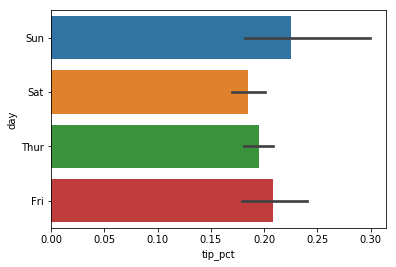

In [16]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [17]:
plt.close('all')

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


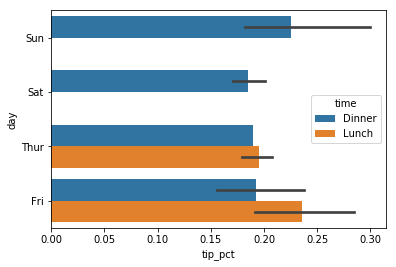

In [18]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [19]:
plt.close('all')

In [20]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [21]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

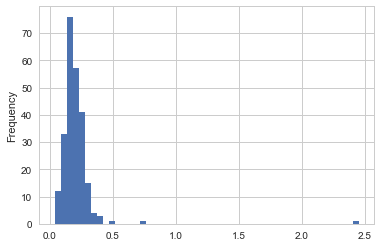

In [22]:
tips['tip_pct'].plot.hist(bins=50)

In [23]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
tips['tip_pct'].plot.density()

In [25]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

C:\ProgramData\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Scatter or Point Plots

In [29]:
macro = pd.read_csv('../../code/python-for-data-analysis/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

In [30]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Changes in log m1 versus log unemp')

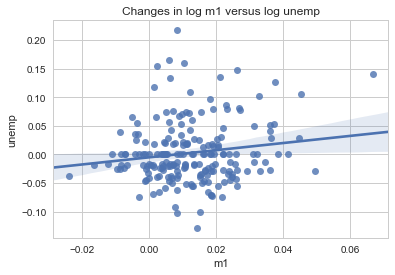

In [31]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [32]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Facet Grids and Categorical Data

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


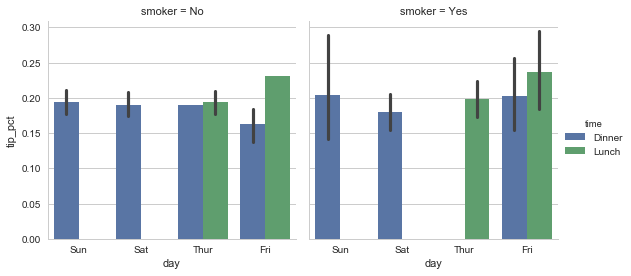

In [33]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [34]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\ProgramData\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


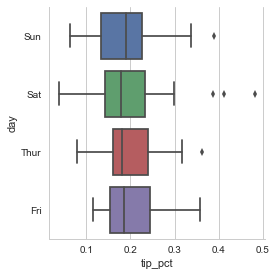

In [35]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

* With tools like Bokeh and Plotly, it’s now possible to specify dynamic, interactive graphics in Python that are destined for a web browser.
* For creating static graphics for print or web, I recommend defaulting to matplotlib and add-on libraries like pandas and seaborn for your needs.

In [36]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion